<a href="https://colab.research.google.com/github/arjunkpreman/Transfer-Learning-Project/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 4s 0us/step


In [4]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False


In [5]:
# Add new classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)  # num_classes is the number of classes in your task

In [6]:

# Create the transfer learning model
model = Model(inputs=base_model.input, outputs=predictions)

In [7]:

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Set up data generators for training and validation
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 3015 images belonging to 10 classes.


In [9]:
val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 921 images belonging to 10 classes.


In [10]:
# Train the model
r=model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=val_generator,
    validation_steps=val_generator.samples // 32,
    epochs=10
)

<ipython-input-10-07f1f0826cdd>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(


Epoch 1/10
94/94 [==============================] - 2506s 27s/step - loss: 1.3150 - accuracy: 0.6413 - val_loss: 0.8027 - val_accuracy: 0.7254
Epoch 2/10
94/94 [==============================] - 19s 199ms/step - loss: 0.3749 - accuracy: 0.8716 - val_loss: 0.5667 - val_accuracy: 0.8069
Epoch 3/10
94/94 [==============================] - 18s 195ms/step - loss: 0.2451 - accuracy: 0.9175 - val_loss: 0.4567 - val_accuracy: 0.8382
Epoch 4/10
94/94 [==============================] - 19s 204ms/step - loss: 0.1393 - accuracy: 0.9618 - val_loss: 0.3152 - val_accuracy: 0.8929
Epoch 5/10
94/94 [==============================] - 18s 192ms/step - loss: 0.0832 - accuracy: 0.9806 - val_loss: 0.3334 - val_accuracy: 0.8795
Epoch 6/10
94/94 [==============================] - 19s 205ms/step - loss: 0.0626 - accuracy: 0.9883 - val_loss: 0.3133 - val_accuracy: 0.8962
Epoch 7/10
94/94 [==============================] - 19s 198ms/step - loss: 0.0389 - accuracy: 0.9970 - val_loss: 0.3145 - val_accuracy: 0.8984

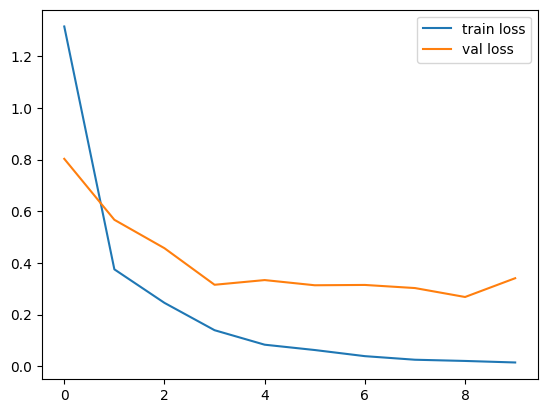

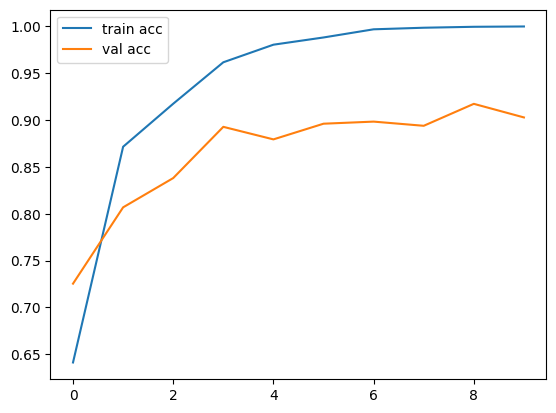

<Figure size 640x480 with 0 Axes>

In [11]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [12]:
# save it as a h5 file

model.save('/content/drive/MyDrive/Dataset/Model_VGG16.h5')

In [13]:
model.evaluate(val_generator)

29/29 [==============================] - 8s 280ms/step - loss: 0.3327 - accuracy: 0.9045


[0.33274734020233154, 0.9044516682624817]

Text(0.5, 1.0, 'Bacterial Spot')

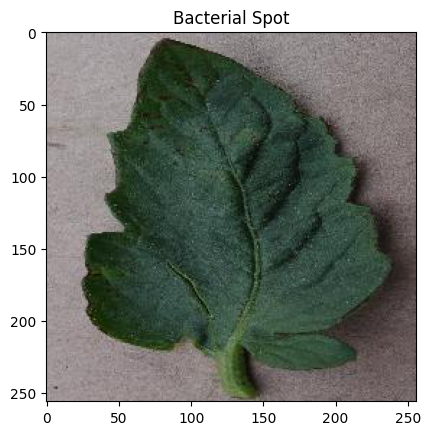

In [14]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/drive/MyDrive/Dataset/train/Tomato___Bacterial_spot/00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG"))
plt.title("Bacterial Spot")

Text(0.5, 1.0, 'Bacterial Spot')

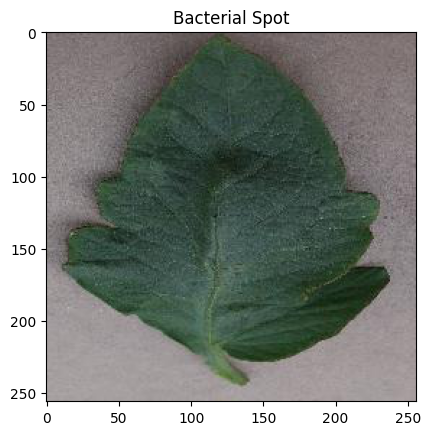

In [15]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/drive/MyDrive/Dataset/test/Tomato___Bacterial_spot/01d7f4fe-793f-4a9b-bc8b-8aa05200984f___GCREC_Bact.Sp 2984.JPG"))
plt.title("Bacterial Spot")